# **<center>Applied Project </center>**


## <center> Portfolio Selection using Deep Learning  </center>

### <center> Quantitiative Analysis: Investment Strategy  </center>
<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://mlfbg.github.io/MachineLearningInFinance/">
    <img src="https://drive.google.com/uc?export=view&id=1gmxxmwCR1WXK0IYtNqvE4QXFleznWqQO" height="50"/>
    Course page</a>
</td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1OX3oU22gh0_gLwrqPRscUlun4aJl3nrv?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />Run in Google Colab</a>
  </td>
</table>

In [ ]:
# Access files from Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for plotting
import datetime
import os
import random # to shuffle the sequences
from IPython.display import Image # for showing graphs from the lectures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pytz
import yfinance as yf

In [ ]:
# Change the directory
os.chdir("./gdrive/My Drive/Colab Notebooks/CW")


# 1. Exploring the dataset

## 1.1 Load the data

In [ ]:
def loadData(Tickers,startDate,endDate):
 stock_final = pd.DataFrame()
# iterate over each symbol
 for i in Tickers:

    # print the symbol which is being downloaded
    print( str(Tickers.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)

    try:
        # download the stock price
        stock = []
        stock = yf.download(i,start=startDate, end=endDate, progress=False)

        # append the individual stock prices
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None
 return(stock_final)

In [ ]:
payload = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
SP_table = payload[0]
SP_table.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


In [ ]:
start_date="2017-01-01"
end_date="2021-12-31"
symbols = SP_table['Symbol'].values.tolist()
n = 60
df=loadData(symbols[:n],start_date,end_date)

0 : MMM,1 : AOS,2 : ABT,3 : ABBV,4 : ABMD,5 : ACN,6 : ATVI,7 : ADM,8 : ADBE,9 : ADP,10 : AAP,11 : AES,12 : AFL,13 : A,14 : APD,15 : AKAM,16 : ALK,17 : ALB,18 : ARE,19 : ALGN,20 : ALLE,21 : LNT,22 : ALL,23 : GOOGL,24 : GOOG,25 : MO,26 : AMZN,27 : AMCR,28 : AMD,29 : AEE,30 : AAL,31 : AEP,32 : AXP,33 : AIG,34 : AMT,35 : AWK,36 : AMP,37 : ABC,38 : AME,39 : AMGN,40 : APH,41 : ADI,42 : ANSS,43 : AON,44 : APA,45 : AAPL,46 : AMAT,47 : APTV,48 : ANET,49 : AJG,50 : AIZ,51 : T,52 : ATO,53 : ADSK,54 : AZO,55 : AVB,56 : AVY,57 : BKR,58 : BALL,59 : BAC,

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2017-01-03,178.830002,180.000000,177.220001,178.050003,150.212097,2509300,MMM
2017-01-04,178.029999,178.899994,177.610001,178.320007,150.439880,1542000,MMM
2017-01-05,178.259995,179.139999,176.889999,177.710007,149.925232,1447800,MMM
2017-01-06,177.289993,178.600006,175.800003,178.229996,150.363968,1625000,MMM
2017-01-09,178.369995,178.380005,177.199997,177.270004,149.554016,1622600,MMM
...,...,...,...,...,...,...,...
2021-12-23,44.680000,45.070000,44.400002,44.419998,43.950722,34053500,BAC
2021-12-27,44.549999,44.820000,44.310001,44.639999,44.168400,33879200,BAC
2021-12-28,44.470001,45.080002,44.419998,44.700001,44.227768,32492400,BAC


In [ ]:
df=df.reset_index()
df["day"]=df["Date"].dt.dayofweek
df["Date"] =pd.to_datetime(df["Date"])
df = df[['Date','Close','Name']]
df=df.set_index(['Date','Name']).unstack('Name')
df=df.reset_index()
df=df.set_index(['Date'])
df.columns = df.Close.columns
df.head()

0 : MMM,1 : AOS,2 : ABT,3 : ABBV,4 : ABMD,5 : ACN,6 : ATVI,7 : ADM,8 : ADBE,9 : ADP,10 : AAP,11 : AES,12 : AFL,13 : A,14 : APD,15 : AKAM,16 : ALK,17 : ALB,18 : ARE,19 : ALGN,20 : ALLE,21 : LNT,22 : ALL,23 : GOOGL,24 : GOOG,25 : MO,26 : AMZN,27 : AMCR,28 : AMD,29 : AEE,30 : AAL,31 : AEP,32 : AXP,33 : AIG,34 : AMT,35 : AWK,36 : AMP,37 : ABC,38 : AME,39 : AMGN,40 : APH,41 : ADI,42 : ANSS,43 : AON,44 : APA,45 : AAPL,46 : AMAT,47 : APTV,48 : ANET,49 : AJG,50 : AIZ,51 : T,52 : ATO,53 : ADSK,54 : AZO,55 : AVB,56 : AVY,57 : BKR,58 : BALL,59 : BAC,

,Date,Close,Name
0,2015-01-02,164.059998,MMM
1,2015-01-05,160.360001,MMM
2,2015-01-06,158.649994,MMM
3,2015-01-07,159.800003,MMM
4,2015-01-08,163.630005,MMM


In [ ]:
df_2=df.copy()
df_2.head()
df_2['Return R']= df_2.SPY.pct_change().fillna(0.1)
df_2.loc[:, 'new_R'] = df_2.apply(lambda r: 0.5 if r['Return R'] < -0.5 else r['Return R'], axis = 1)

In [ ]:
df_2['New_index']=df_2.loc[df.index[0],'SPY']

In [ ]:
for i in range(len(df_2.index)):
    if i > 0:
        #print (1.0-df.loc[df.index[i], 'new_R'], df.loc[df.index[i-1], 'New_index'])
        df_2.loc[df_2.index[i], 'New_index'] = df_2.loc[df_2.index[i-1], 'New_index']*(1.0+df_2.loc[df_2.index[i], 'new_R'])

In [ ]:
ser = pd.Series(pd.Categorical(df_2.SPY))
ser.to_numpy()

array([205.42999268, 201.72000122, 199.82000732, ..., 458.97000122,
       464.6000061 , 455.55999756])

In [ ]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
ser = pd.Series(pd.Categorical(df_2.SPY))
ser=ser.to_numpy().reshape(-1,1)
df_2.SPY=standard.fit_transform(ser)

In [ ]:
top_ten_stock = ['AAPL', 'MSFT', 'AMZN', 'TSLA', 'GOOGL', 'GOOG', 'NVDA', 'EBAY', 'META', 'UNH']
#top_ten_stock = stockList.remove('SPY')
ind='SPY'

In [ ]:
for s in top_ten_stock:
   ser = pd.Series(pd.Categorical(df[s]))
   ser=ser.to_numpy().reshape(-1,1)
   df_2[s] = standard.fit_transform(ser)

In [ ]:
ser = pd.Series(pd.Categorical(df_2['New_index']))
ser=ser.to_numpy().reshape(-1,1)
df_2['New_index'] = standard.transform(ser)

In [ ]:
df_2.head()

Name,AAPL,AMZN,EBAY,GOOG,GOOGL,META,MSFT,NVDA,SPY,TSLA,UNH,Return R,new_R,New_index
Date,,,,,,,,,,,,,,
2015-01-02,-0.846888,-1.335685,-1.127455,-1.155808,-1.184355,-1.372378,-0.990448,-0.939520,-1.052433,-0.540480,-1.425855,0.100000,0.100000,-0.283192
2015-01-05,-0.866865,-1.342053,-1.142286,-1.174389,-1.201976,-1.389444,-0.996081,-0.940928,-1.105075,-0.547746,-1.443980,-0.018060,-0.018060,-0.323701
2015-01-06,-0.866801,-1.348995,-1.165006,-1.194618,-1.224364,-1.403531,-1.004990,-0.943413,-1.132034,-0.546808,-1.446164,-0.009419,-0.009419,-0.344447
2015-01-07,-0.857136,-1.345846,-1.167847,-1.196078,-1.226966,-1.403531,-0.997391,-0.943621,-1.096703,-0.547068,-1.435136,0.012461,0.012461,-0.317259
2015-01-08,-0.830284,-1.343794,-1.121143,-1.193395,-1.223892,-1.376035,-0.979574,-0.940639,-1.045764,-0.547329,-1.383053,0.017745,0.017745,-0.278060


In [ ]:
df.head()

Name,AAPL,AMZN,EBAY,GOOG,GOOGL,META,MSFT,NVDA,SPY,TSLA,UNH
Date,,,,,,,,,,,
2015-01-02,27.332500,15.4260,23.657408,26.168653,26.477501,78.449997,46.759998,5.0325,205.429993,43.862000,100.779999
2015-01-05,26.562500,15.1095,23.459597,25.623152,25.973000,77.190002,46.330002,4.9475,201.720001,42.018002,99.120003
2015-01-06,26.565001,14.7645,23.156567,25.029282,25.332001,76.150002,45.650002,4.7975,199.820007,42.256001,98.919998
2015-01-07,26.937500,14.9210,23.118687,24.986401,25.257500,76.150002,46.230000,4.7850,202.309998,42.189999,99.930000
2015-01-08,27.972500,15.0230,23.741583,25.065184,25.345501,78.180000,47.590000,4.9650,205.899994,42.124001,104.699997


# Process the data

In [ ]:
def create_dataset(df):
    dataX = []
    for c in df.columns:
        x = df.loc[:, c].to_numpy()
        dataX.append(x)
    return np.array(dataX), np.array(dataX)

In [ ]:
def create_dataset_index(df):
    dataX = []
    dataY = []
    for i in df.index:
        x = df.loc[i, top_ten_stock].to_numpy()
        dataX.append(x)
        y = df.loc[i, 'SPY']
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [ ]:
def create_dataset_new_index(df):
    dataX = []
    dataY = []
    for i in df.index:
        x = df.loc[i, top_ten_stock].to_numpy()
        dataX.append(x)
        y = df.loc[i, 'New_index']
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [ ]:
def split_data(df,TrainEndDate='2018-01-01',ValDate='2019-01-01' ):

  # training data
  data_train = df[(df.index < TrainEndDate)]


  # testing
  df_test = df[(df.index >= ValDate)]

  # validation
  df_val = df[(df.index >= TrainEndDate) & (df.index < ValDate)]


  return (data_train, df_val, df_test)


In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list or tuple else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('%s(t-%d)' % (str(df.columns[j]), i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('%s(t)' % (str(df.columns[j]))) for j in range(n_vars)]
		else:
			names += [('%s(t+%d)' % (str(df.columns[j]), i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
#test
def split_XY(data,n_lag,n_feature,LSTM=True):
  # split into train and test sets
   data = data.values
  # split into input and outputs
   n_observation=n_lag*n_feature
   data_X, data_y = data[:, :n_observation], data[:, -n_feature]
   print(data_y.shape)
   print(data_X.shape)
   if(LSTM):
     # reshape input to be 3D [samples, timesteps, features]
     data_X = data_X.reshape((data_X.shape[0],n_lag, n_feature))
     print(data_X.shape, data_y.shape)
   return(data_X, data_y)


In [ ]:
def get_train_test_data(df,lag_N,n_feature,LSTM=True,IsNormalised=True):

     D_train, D_val, D_test = split_data(df)
     print(D_train)

     if(IsNormalised==False):

       scaler = MinMaxScaler(feature_range=(0, 1))
       D_train = scaler.fit_transform(D_train)
       D_val = scaler.fit_transform(D_val)
       D_test = scaler.fit_transform(D_test)
       print(D_train)

     D_Train = series_to_supervised(D_train, lag_N, 1)
     D_Val = series_to_supervised(D_val, lag_N, 1)
     D_Test= series_to_supervised(D_test, lag_N, 1)
     train_X, train_y=split_XY(D_Train,lag_N,n_feature,LSTM)
     val_X, val_y=split_XY(D_Val,lag_N,n_feature,LSTM)
     test_X, test_y =split_XY(D_Test,lag_N,n_feature,LSTM)
     return(train_X, train_y,test_X, test_y,val_X,val_y)


#  Stock Data

## LSTM

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Bidirectional
from keras.layers import CuDNNLSTM
from tensorflow.keras import activations
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
lag_N=3
n_feature=1
predicted=pd.DataFrame()
predicted

""


AAPL
(755,) (251,) (735,)
(752,)
(752, 3)
(752, 3, 1) (752,)
(248,)
(248, 3)
(248, 3, 1) (248,)
(732,)
(732, 3)
(732, 3, 1) (732,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 32)             4352      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 1312      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 5,673
Trainable params: 5,673
Non-trainable params: 0
_________________________________________________________________


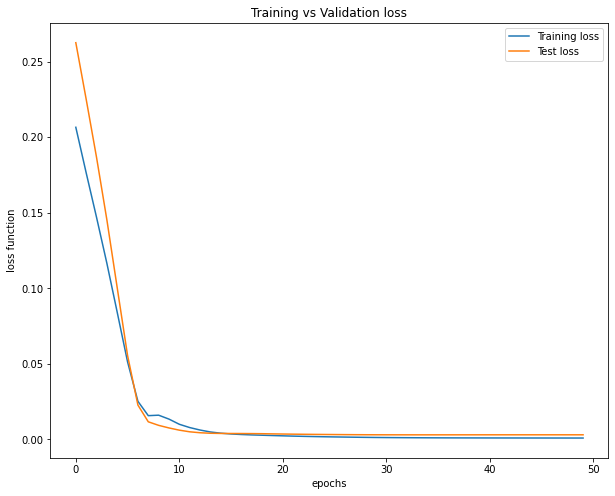

23/23 [==============================] - 0s 2ms/step - loss: 5.3040e-04
yhatAAPL


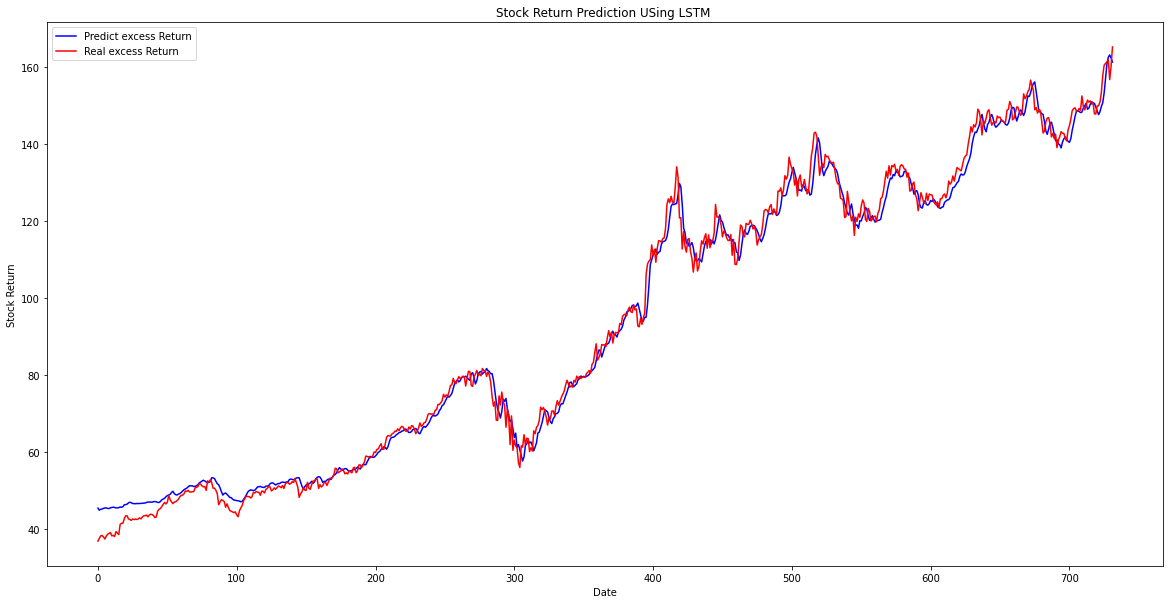

MSFT
(755,) (251,) (735,)
(752,)
(752, 3)
(752, 3, 1) (752,)
(248,)
(248, 3)
(248, 3, 1) (248,)
(732,)
(732, 3)
(732, 3, 1) (732,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 32)             4352      
                                                                 
 lstm_3 (LSTM)               (None, 8)                 1312      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5,673
Trainable params: 5,673
Non-trainable params: 0
_________________________________________________________________


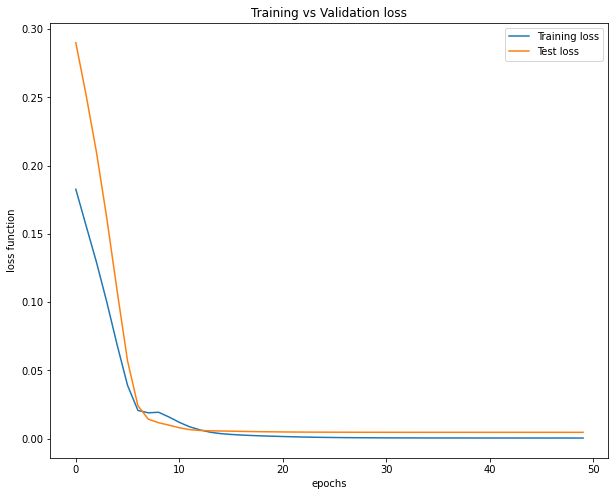

23/23 [==============================] - 0s 3ms/step - loss: 3.5129e-04
yhatMSFT


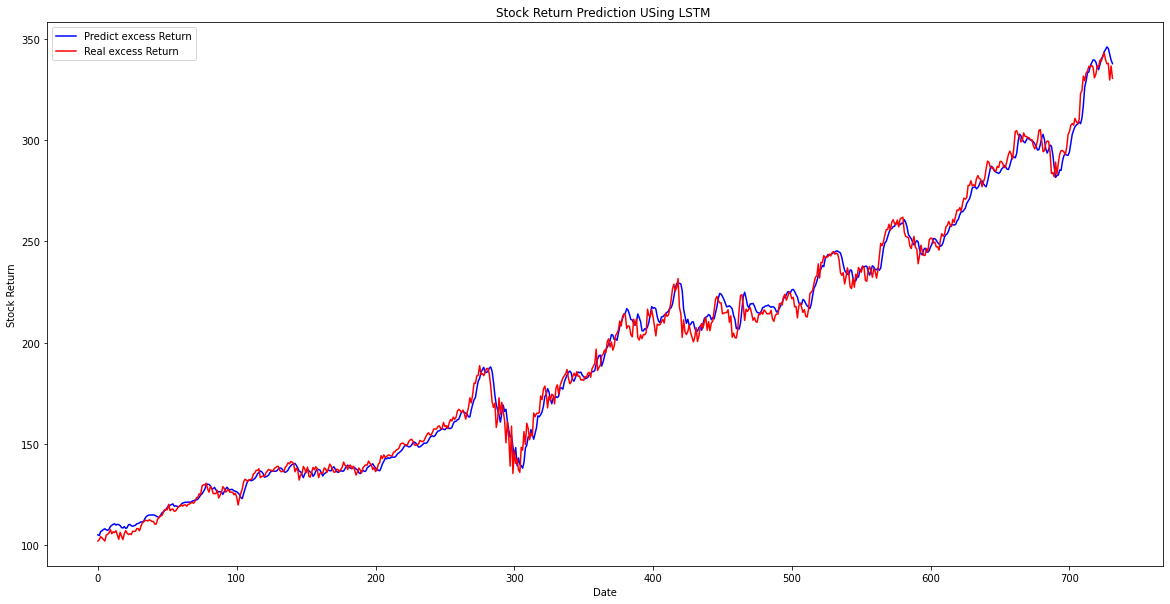

AMZN
(755,) (251,) (735,)
(752,)
(752, 3)
(752, 3, 1) (752,)
(248,)
(248, 3)
(248, 3, 1) (248,)
(732,)
(732, 3)
(732, 3, 1) (732,)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 32)             4352      
                                                                 
 lstm_5 (LSTM)               (None, 8)                 1312      
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5,673
Trainable params: 5,673
Non-trainable params: 0
_________________________________________________________________


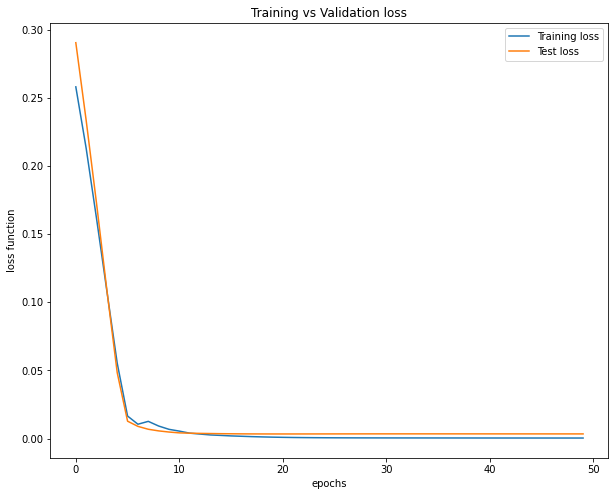

23/23 [==============================] - 0s 2ms/step - loss: 9.0946e-04
yhatAMZN


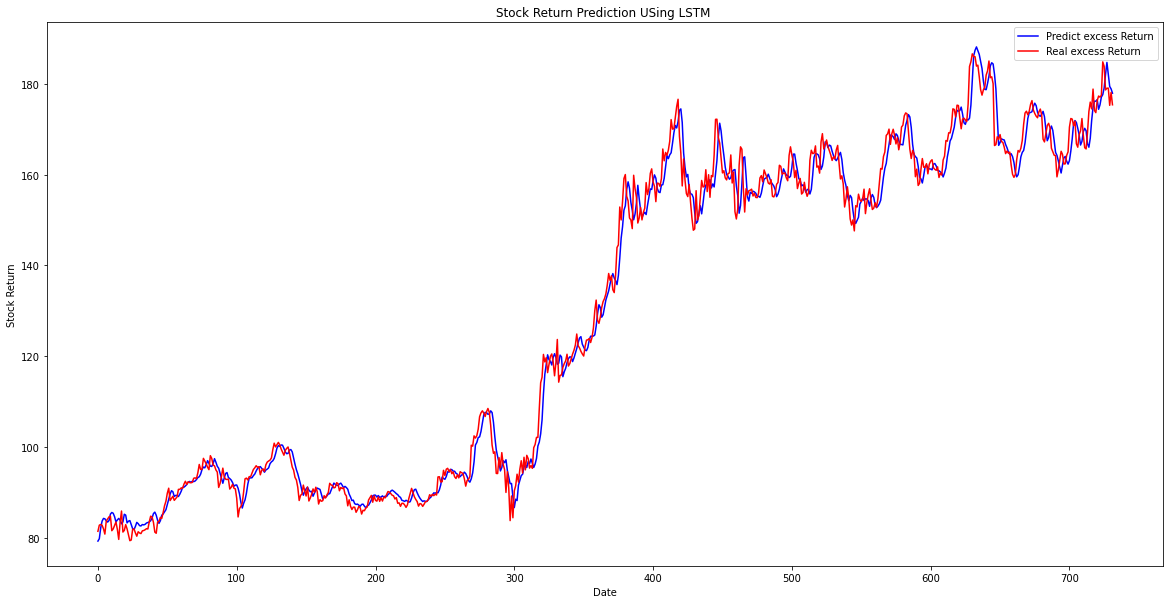

TSLA
(755,) (251,) (735,)
(752,)
(752, 3)
(752, 3, 1) (752,)
(248,)
(248, 3)
(248, 3, 1) (248,)
(732,)
(732, 3)
(732, 3, 1) (732,)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 3, 32)             4352      
                                                                 
 lstm_7 (LSTM)               (None, 8)                 1312      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5,673
Trainable params: 5,673
Non-trainable params: 0
_________________________________________________________________


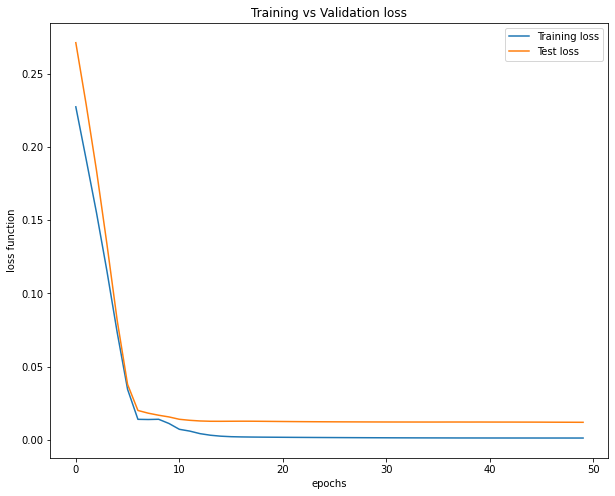

23/23 [==============================] - 0s 2ms/step - loss: 0.0010
yhatTSLA


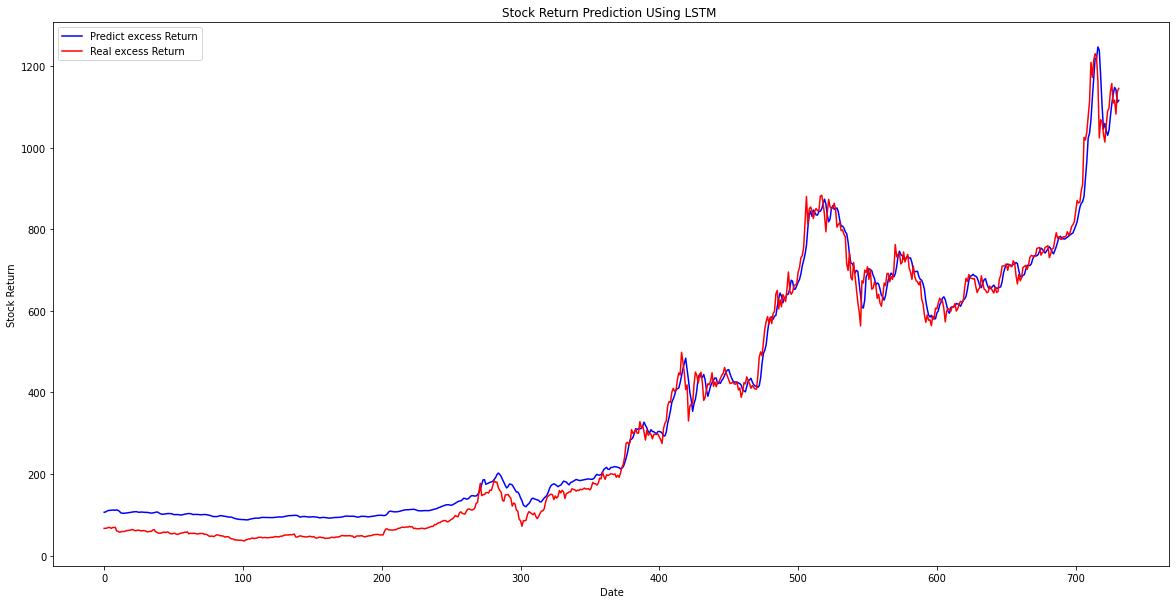

GOOGL
(755,) (251,) (735,)
(752,)
(752, 3)
(752, 3, 1) (752,)
(248,)
(248, 3)
(248, 3, 1) (248,)
(732,)
(732, 3)
(732, 3, 1) (732,)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 3, 32)             4352      
                                                                 
 lstm_9 (LSTM)               (None, 8)                 1312      
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5,673
Trainable params: 5,673
Non-trainable params: 0
_________________________________________________________________


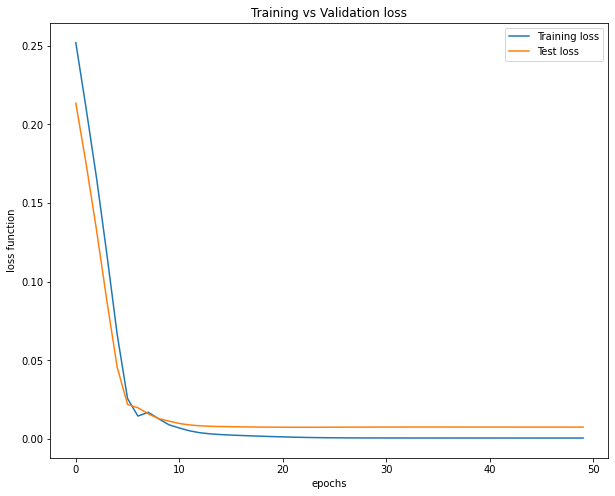

23/23 [==============================] - 0s 3ms/step - loss: 3.9866e-04
yhatGOOGL


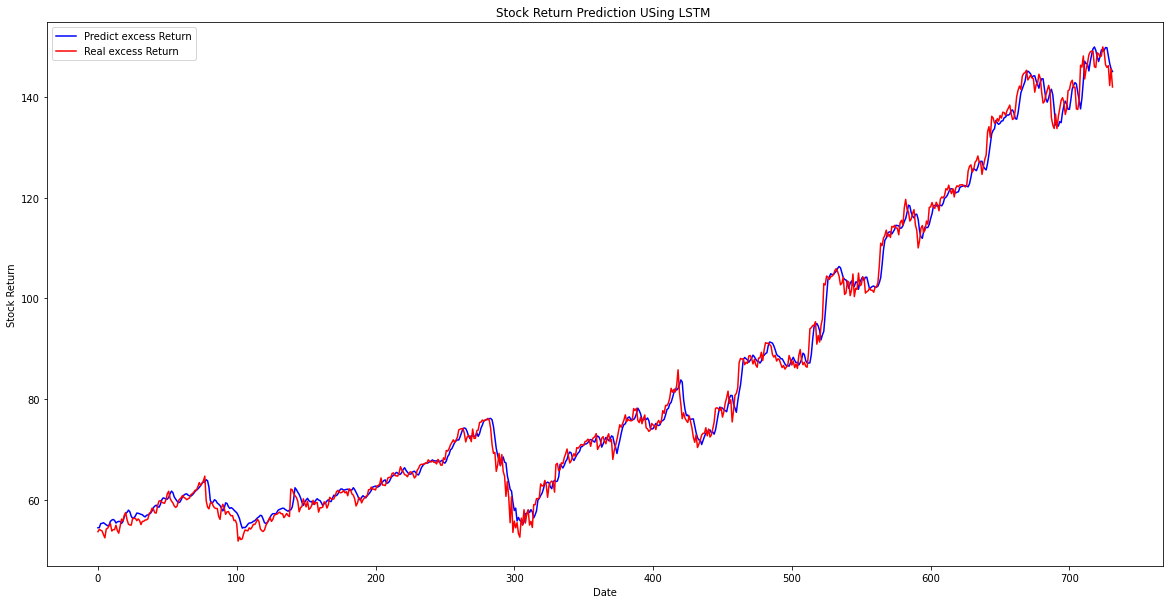

GOOG
(755,) (251,) (735,)
(752,)
(752, 3)
(752, 3, 1) (752,)
(248,)
(248, 3)
(248, 3, 1) (248,)
(732,)
(732, 3)
(732, 3, 1) (732,)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 3, 32)             4352      
                                                                 
 lstm_11 (LSTM)              (None, 8)                 1312      
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5,673
Trainable params: 5,673
Non-trainable params: 0
_________________________________________________________________


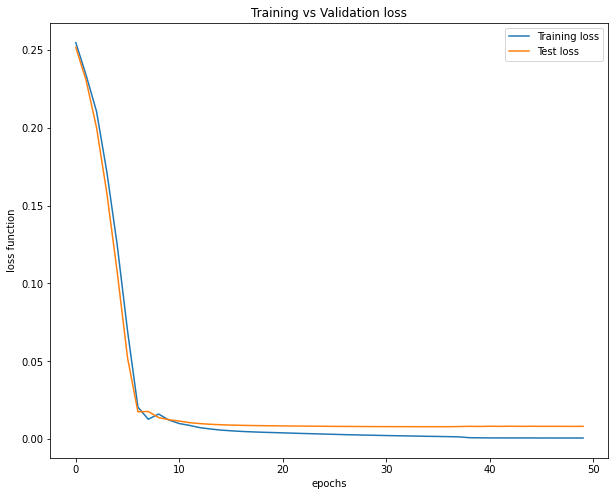

23/23 [==============================] - 0s 3ms/step - loss: 4.6609e-04
yhatGOOG


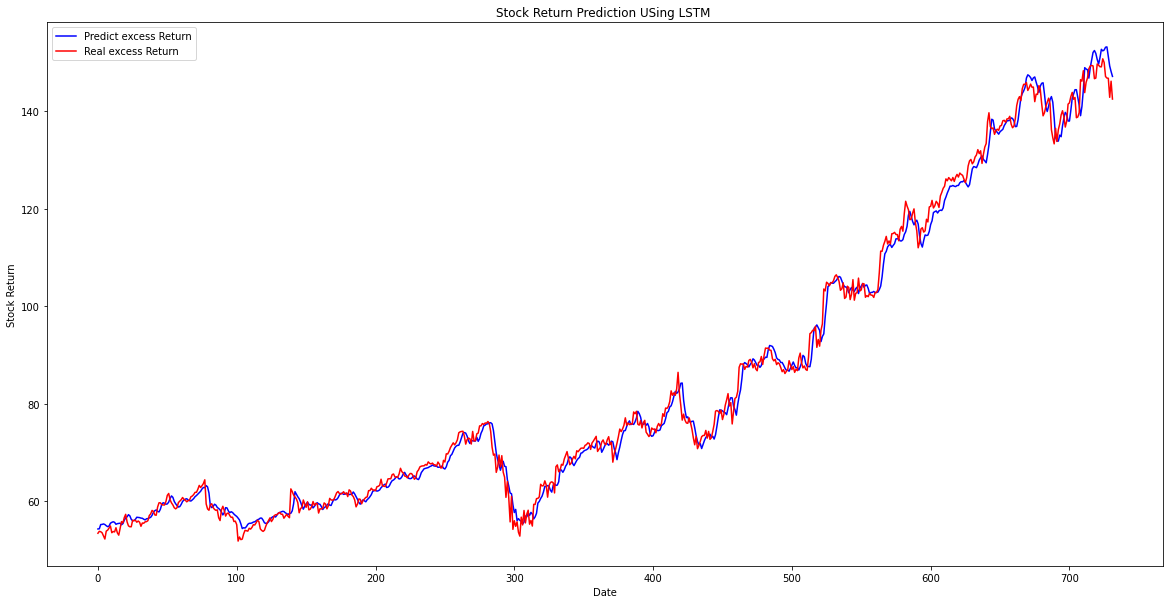

NVDA
(755,) (251,) (735,)
(752,)
(752, 3)
(752, 3, 1) (752,)
(248,)
(248, 3)
(248, 3, 1) (248,)
(732,)
(732, 3)
(732, 3, 1) (732,)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 3, 32)             4352      
                                                                 
 lstm_13 (LSTM)              (None, 8)                 1312      
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5,673
Trainable params: 5,673
Non-trainable params: 0
_________________________________________________________________


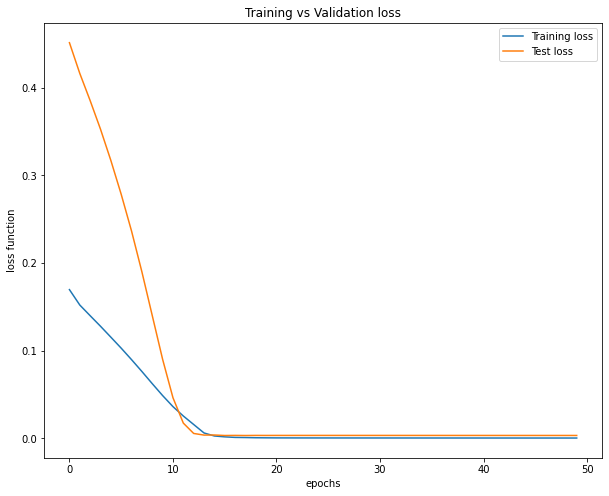

23/23 [==============================] - 0s 3ms/step - loss: 2.9450e-04
yhatNVDA


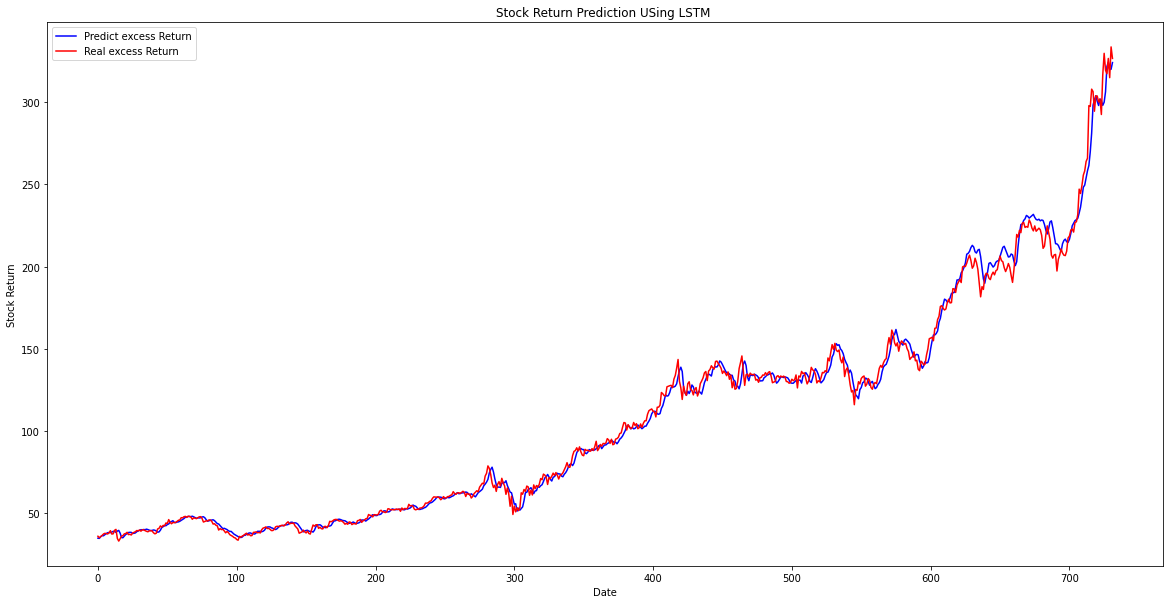

EBAY
(755,) (251,) (735,)
(752,)
(752, 3)
(752, 3, 1) (752,)
(248,)
(248, 3)
(248, 3, 1) (248,)
(732,)
(732, 3)
(732, 3, 1) (732,)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 3, 32)             4352      
                                                                 
 lstm_15 (LSTM)              (None, 8)                 1312      
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5,673
Trainable params: 5,673
Non-trainable params: 0
_________________________________________________________________


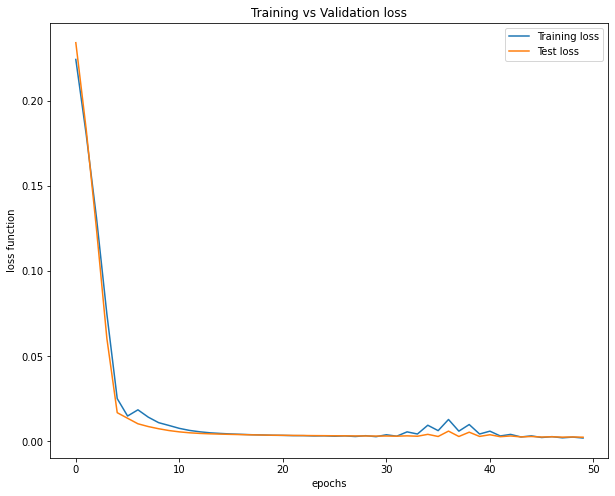

23/23 [==============================] - 0s 3ms/step - loss: 9.6625e-04
yhatEBAY


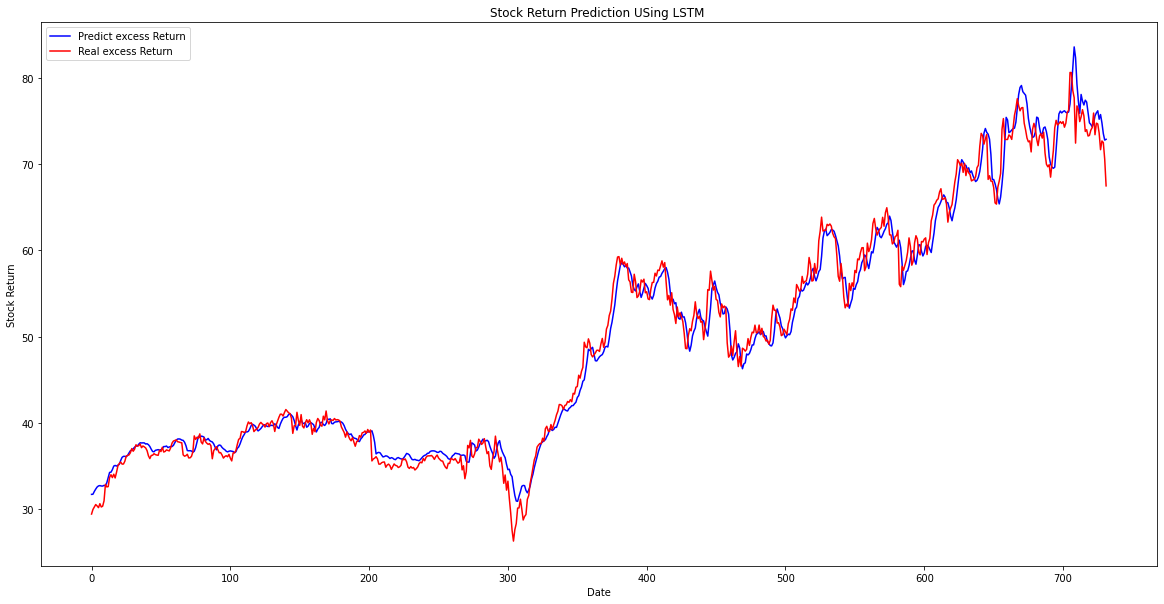

META
(755,) (251,) (735,)
(752,)
(752, 3)
(752, 3, 1) (752,)
(248,)
(248, 3)
(248, 3, 1) (248,)
(732,)
(732, 3)
(732, 3, 1) (732,)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 3, 32)             4352      
                                                                 
 lstm_17 (LSTM)              (None, 8)                 1312      
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5,673
Trainable params: 5,673
Non-trainable params: 0
_________________________________________________________________


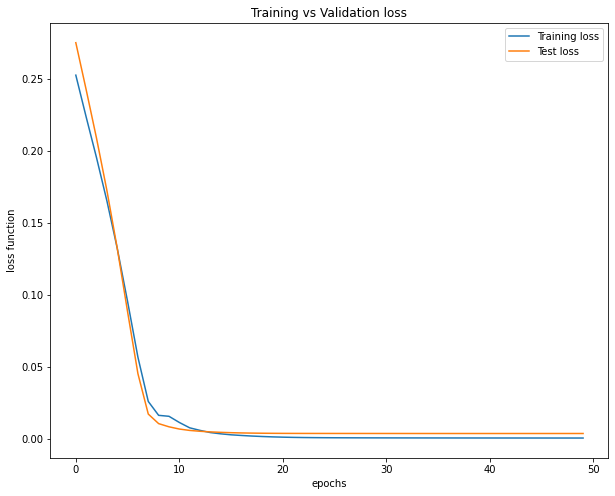

23/23 [==============================] - 0s 3ms/step - loss: 7.7337e-04
yhatMETA


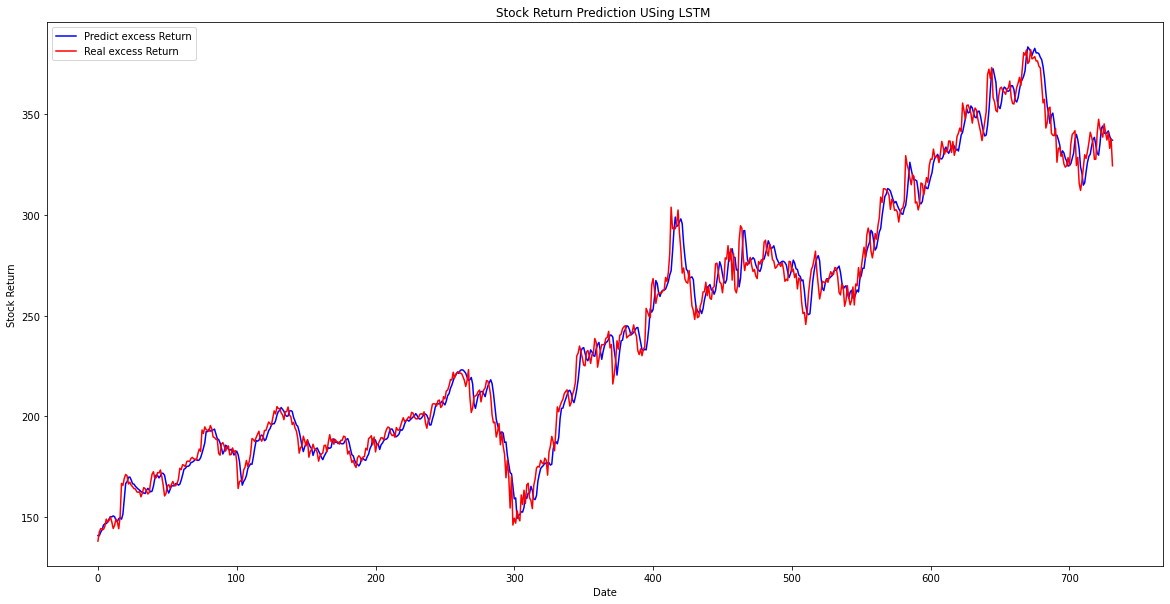

UNH
(755,) (251,) (735,)
(752,)
(752, 3)
(752, 3, 1) (752,)
(248,)
(248, 3)
(248, 3, 1) (248,)
(732,)
(732, 3)
(732, 3, 1) (732,)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 3, 32)             4352      
                                                                 
 lstm_19 (LSTM)              (None, 8)                 1312      
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5,673
Trainable params: 5,673
Non-trainable params: 0
_________________________________________________________________


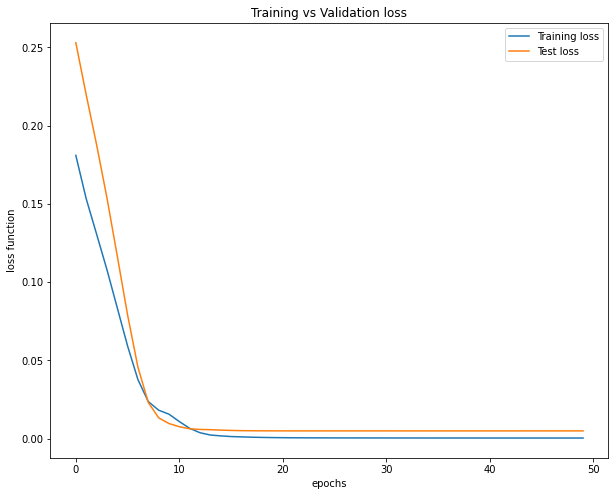

23/23 [==============================] - 0s 2ms/step - loss: 8.6892e-04
yhatUNH


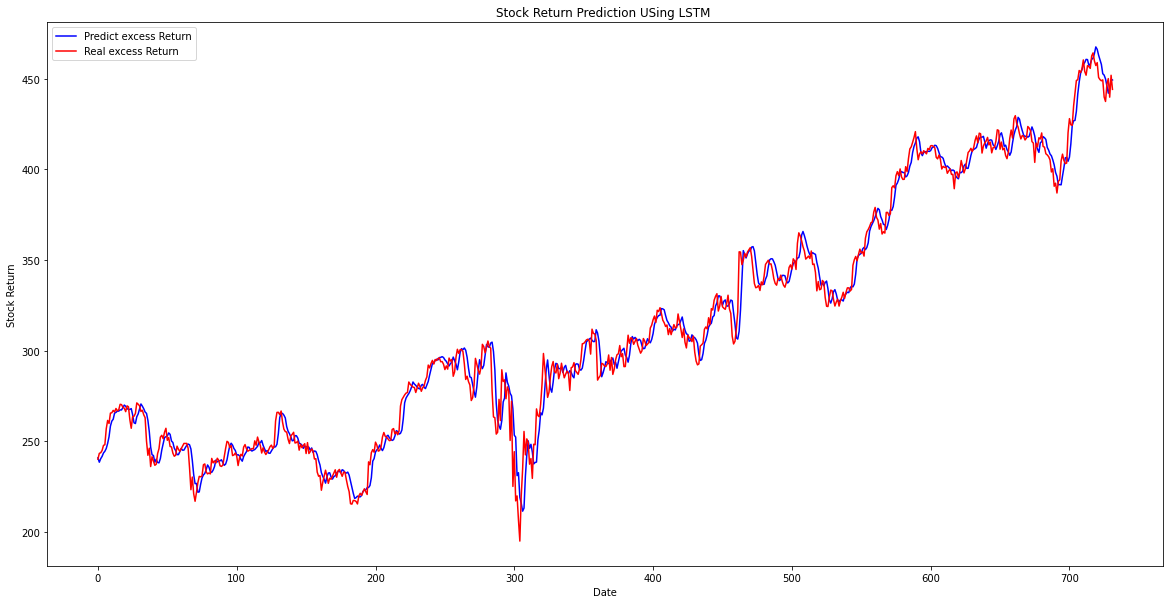

SPY
(755,) (251,) (735,)
(752,)
(752, 3)
(752, 3, 1) (752,)
(248,)
(248, 3)
(248, 3, 1) (248,)
(732,)
(732, 3)
(732, 3, 1) (732,)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 3, 32)             4352      
                                                                 
 lstm_21 (LSTM)              (None, 8)                 1312      
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 5,673
Trainable params: 5,673
Non-trainable params: 0
_________________________________________________________________


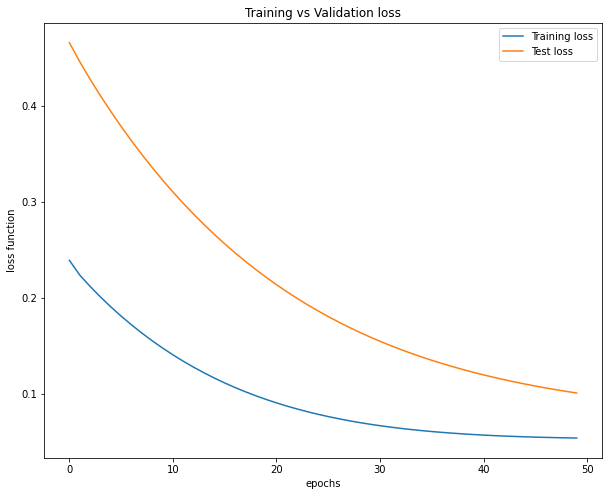

23/23 [==============================] - 0s 4ms/step - loss: 0.0669
yhatSPY


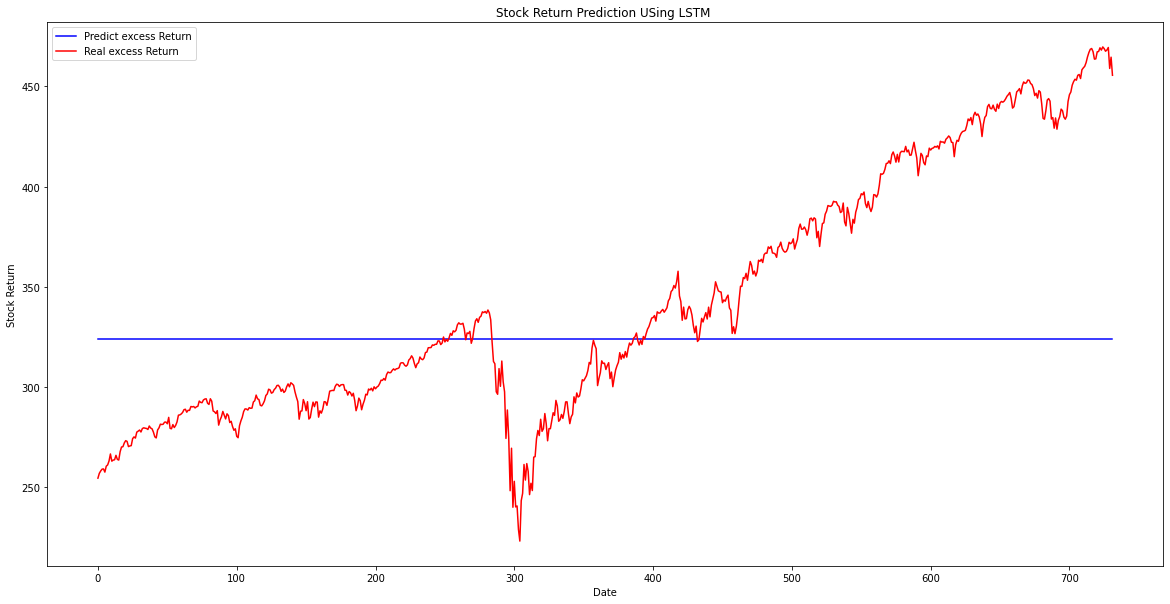

In [ ]:
for s in stockList:
  print(s)
  # split data into training, validation, test dataset
  SP_data=df[s]
  D_train, D_val, D_test = split_data(SP_data)
  print(D_train.shape, D_val.shape, D_test.shape)
  # Normalised data
  scaler = MinMaxScaler(feature_range=(0, 1))
  D_train, D_val, D_test = pd.Series(pd.Categorical(D_train)),pd.Series(pd.Categorical(D_val)),pd.Series(pd.Categorical(D_test))
  D_train, D_val, D_test=D_train.to_numpy().reshape(-1,1),D_val.to_numpy().reshape(-1,1), D_test.to_numpy().reshape(-1,1)
  D_train, D_val, D_test = scaler.fit_transform(D_train), scaler.fit_transform(D_val), scaler.fit_transform(D_test)
  # transform to supervised series
  D_Train = series_to_supervised(D_train, lag_N, 1)
  D_Val = series_to_supervised(D_val, lag_N, 1)
  D_Test= series_to_supervised(D_test, lag_N, 1)
  # split data into features(X) and target(y)
  train_X_sp, train_y_sp=split_XY(D_Train,lag_N,n_feature,True)
  val_X_sp, val_y_sp=split_XY(D_Val,lag_N,n_feature,True)
  test_X_sp, test_y_sp =split_XY(D_Test,lag_N,n_feature,True)
  # build the LSTM_model
  LSTM_Mode1 = Sequential()
  LSTM_Mode1.add(LSTM(units = 32, activation = 'relu', return_sequences = True, input_shape = (train_X_sp.shape[1], train_X_sp.shape[2])))
  LSTM_Mode1.add(LSTM(units = 8, activation = 'relu'))

  LSTM_Mode1.add(Dense(units =1))
  LSTM_Mode1.summary()
  # Compile model
  LSTM_Mode1.compile(
    loss='mean_squared_error',
    optimizer='adam')
  # fit the model
  LSTMfit = LSTM_Mode1.fit(
    train_X_sp,
    train_y_sp,
    epochs=50,
    batch_size=50,
    validation_data=(val_X_sp, val_y_sp),
    verbose=0, shuffle=False)
  # plot
  fig, ax = plt.subplots(figsize=(10, 8))
  plt.plot(range(50), LSTMfit.history["loss"], label = "Training loss")
  plt.plot(range(50), LSTMfit.history["val_loss"], label = "Test loss")
  plt.xlabel("epochs")
  plt.ylabel("loss function")
  plt.title("Training vs Validation loss")
  plt.legend()
  plt.show()

  y_hat=LSTM_Mode1.predict(test_X_sp)
  Loss_LSTM=LSTM_Mode1.evaluate(test_X_sp, test_y_sp)

  # invert scaling for forecast
  test_X_sp = test_X_sp.reshape((test_X_sp.shape[0], lag_N*n_feature))
  inv_yhat = np.concatenate((y_hat, test_X_sp[:, -1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]
  # invert scaling for actual
  test_y_sp = test_y_sp.reshape((len(test_y_sp), 1))
  inv_y = np.concatenate((test_y_sp, test_X_sp[:, -1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]

	# input sequence (t-n, ... t-1)
  N1 ='yhat'+s
  print(N1)
  predicted[N1]=y_hat.tolist()
  N2 = '%s(_Inverse_yhat)' % (str(s))
  predicted[N2]=inv_yhat.tolist()
  N3 = '%s(_Inverse_y)' % (str(s))
  predicted[N3]=inv_y.tolist()

  plt.figure(figsize=(20, 10))

  plt.plot( inv_yhat, color = 'b',label = "Predict excess Return")
  plt.plot( inv_y, color = 'r',label = "Real excess Return")

  plt.xlabel("Date")
  plt.ylabel("Stock Return")
  plt.title("Stock Return Prediction USing LSTM ")
  plt.legend()
  plt.show()


In [ ]:
LSTM_Mode1 = Sequential()
LSTM_Mode1.add(LSTM(units = 32, activation = 'relu', return_sequences = True, input_shape = (train_X_sp.shape[1], train_X_sp.shape[2])))
LSTM_Mode1.add(LSTM(units = 8, activation = 'relu'))
LSTM_Mode1.add(Dense(units =1))
LSTM_Mode1.summary()

In [ ]:
LSTM_Mode1.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

LSTMfit = LSTM_Mode1.fit(
    train_X_sp,
    train_y_sp,
    epochs=50,
    batch_size=50,
    validation_data=(val_X_sp, val_y_sp),
    verbose=2, shuffle=False)

In [ ]:
y_hat=LSTM_Mode1.predict(test_X_sp)

In [ ]:
Loss_LSTM=LSTM_Mode1.evaluate(test_X_sp, test_y_sp)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(range(50), LSTMfit.history["loss"], label = "Training loss")
plt.plot(range(50), LSTMfit.history["val_loss"], label = "Test loss")
plt.xlabel("epochs")
plt.ylabel("loss function")
plt.title("Training vs Validation loss")
plt.legend()
plt.show()

In [ ]:
...
# invert scaling for forecast
test_X_sp = test_X_sp.reshape((test_X_sp.shape[0], lag_N*n_feature))
inv_yhat = np.concatenate((y_hat, test_X_sp[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y_sp = test_y_sp.reshape((len(test_y_sp), 1))
inv_y = np.concatenate((test_y_sp, test_X_sp[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [ ]:
...
# invert scaling for forecast
test_X_sp = test_X_sp.reshape((test_X_sp.shape[0], lag_N*n_feature))
inv_yhat = np.concatenate((y_hat, test_X_sp[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y_sp = test_y_sp.reshape((len(test_y_sp), 1))
inv_y = np.concatenate((test_y_sp, test_X_sp[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

plt.figure(figsize=(20, 10))

plt.plot( inv_yhat, color = 'b',label = "Predict excess Return")
plt.plot( inv_y, color = 'r',label = "Real excess Return")

plt.xlabel("Date")
plt.ylabel("Stock Return")
plt.title("Stock Return Prediction USing LSTM ")
plt.legend()
plt.show()

In [ ]:
values = SP_data.values

# specify columns to plot
groups = [ 1, 2]
i = 1
# plot each column
fig, ax = plt.subplots(figsize=(20, 10))

for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(SP_data.columns[group], y=0.5, loc='right')
	i += 1

plt.show()

In [ ]:
SP_data.head()

# Portfolio build

In [ ]:
  D_train, D_val, D_test = split_data(df_2,TrainEndDate='2020-01-01',ValDate='2020-01-01')
  train_x, train_y = create_dataset_index(D_train)

In [ ]:
train_x.shape

(1258, 10)

In [ ]:
model = Sequential()
model.add(Dense(5, activation='tanh',input_dim=10))
model.add(Dropout(0.1))
model.add(Dense(2, activation='tanh',input_dim=5))
model.add(Dropout(0.1))
model.add(Dense(1, activation='tanh',input_dim=2))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.fit(train_x, train_y, epochs=200, batch_size=20, verbose = 0)

In [ ]:
train_x, train_y = create_dataset_new_index(D_train)

new_model = Sequential()
new_model.add(Dense(5, activation='tanh',input_dim=10))
new_model.add(Dropout(0.1))
new_model.add(Dense(2, activation='tanh',input_dim=5))
new_model.add(Dropout(0.1))
new_model.add(Dense(1, activation='tanh',input_dim=2))
new_model.compile(loss='mean_squared_error', optimizer='rmsprop')
new_model.fit(train_x, train_y, epochs=200, batch_size=20, verbose = 0)

In [ ]:
predicted2=pd.DataFrame(columns=['pred','new_pred'])
df_2 = df_2[df_2.index > pd.to_datetime('2020-01-01')]
for i in df_2.index:
     x = df_2.loc[i, top_ten_stock].to_numpy()
     predicted2.loc[i,'pred'] = model.predict(x.reshape(1,10).tolist())

In [ ]:
for i in df_2.index:
     x = df_2.loc[i, top_ten_stock].to_numpy()
     predicted2.loc[i,'new_pred'] = new_model.predict(x.reshape(1,10).tolist())
     y = df_2.loc[i, 'SPY']



In [ ]:
predicted2=pd.DataFrame(predicted2)
predicted2

,pred,new_pred
2020-01-02,[[0.7567687]],[[0.80093265]]
2020-01-03,[[0.7422529]],[[0.79607314]]
2020-01-06,[[0.7582555]],[[0.7968447]]
2020-01-07,[[0.7509146]],[[0.79269767]]
2020-01-08,[[0.7797038]],[[0.79831177]]
...,...,...
2021-11-23,[[0.98237836]],[[0.81179684]]
2021-11-24,[[0.982523]],[[0.81204206]]
2021-11-26,[[0.9822421]],[[0.80763125]]
2021-11-29,[[0.98158413]],[[0.80375916]]


In [ ]:
ser = predicted2['pred'].astype(float)
ser=ser.to_numpy().reshape(-1,1)
predicted2['pred'] = standard.inverse_transform(ser)

In [ ]:
ser2 = predicted2['new_pred'].astype(float)
ser2=ser2.to_numpy().reshape(-1,1)
predicted2['new_pred'] = standard.inverse_transform(ser2)

In [ ]:
ser3 = df_2['SPY'].astype(float)
ser3=ser3.to_numpy().reshape(-1,1)
df_2['SPY'] = standard.inverse_transform(ser3)

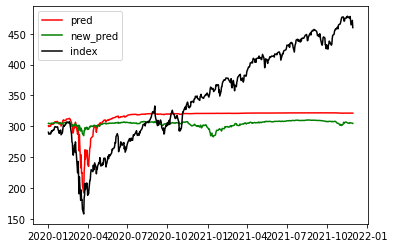

In [ ]:
plt.plot(predicted2['pred'], 'r', label = 'pred')
plt.plot(predicted2['new_pred'], 'g', label = 'new_pred')
#plt.plot(en.inverse_transform(df['new_index']), 'b', label = 'new index')
plt.plot(df_2['SPY'], 'k', label = 'index')
plt.legend()
plt.show()